# Neural Network Implementations: Shallow, Matrix, and Deep Networks

In this notebook we will:

1. Define the **Rectified Linear Unit (ReLU)** function.
2. Define a **shallow neural network** (one input, one output, three hidden units) and run it:
   - First by running on each input value one-by-one.
   - Then by using a matrix formulation (processing all inputs at once) and verifying both methods produce the same plot.
3. Define a **second network** that takes the output of the first network as input and plot its output.
4. Finally, create a **deep network with 3 hidden layers**.

For simplicity, we will manually define weights and biases.

In [2]:
# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility (if needed)
torch.manual_seed(0)
np.random.seed(0)


In [3]:
def relu(x):
    """
    Rectified Linear Unit (ReLU) activation.
    Works element-wise on tensors.
    """
    return torch.where(x > 0, x, torch.zeros_like(x))


## 2. Define a Shallow Neural Network (Non-Matrix Version)

This network has:
- **Input layer**: 1 neuron
- **Hidden layer**: 3 neurons
- **Output layer**: 1 neuron

We will define the network manually using fixed weights and biases.

**Architecture:**

1. First layer: \( h = \text{ReLU}(w_1 \cdot x + b_1) \)
2. Second layer: \( y = w_2 \cdot h + b_2 \)


In [6]:
# Define parameters for the shallow network (non-matrix version)
# First layer: 1 input -> 3 hidden neurons
w1 = torch.tensor([[0.5],    # neuron 1 weight
                   [-0.3],   # neuron 2 weight
                   [0.8]])   # neuron 3 weight   (shape: [3,1])
b1 = torch.tensor([0.1, 0.2, -0.1])  # shape: [3]

# Second layer: 3 hidden -> 1 output
w2 = torch.tensor([1.0, -1.5, 0.7])    # shape: [3]
b2 = torch.tensor(0.3)                # scalar

def shallow_network_single(x_scalar):
    """
    Runs the shallow network on a single scalar input.
    x_scalar: a Python float or a 1-element tensor.
    """
    # Ensure input is a tensor of shape [1] with the same dtype as w1 (float32)
    if not torch.is_tensor(x_scalar):
        x_scalar = torch.tensor([x_scalar], dtype=w1.dtype)
    else:
        x_scalar = x_scalar.flatten().to(w1.dtype)

    # First layer: compute linear transformation and apply ReLU
    h = relu(w1.flatten() * x_scalar + b1)
    # Second layer: linear combination to produce output
    y = torch.dot(w2, h) + b2
    return y.item()  # return as Python float

# Test the function with one value:
print("shallow_network_single(2.0) =", shallow_network_single(2.0))


shallow_network_single(2.0) = 2.450000047683716


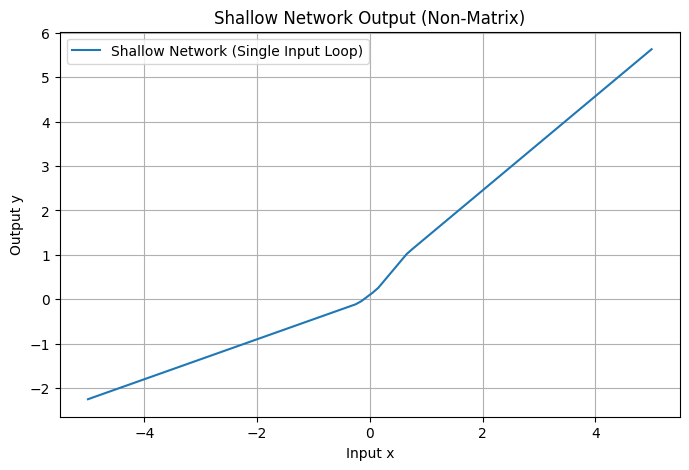

In [7]:
# Define a range of input values (e.g., from -5 to 5)
x_values = np.linspace(-5, 5, 100)  # 100 values

# Compute network outputs one-by-one (non-matrix version)
y_outputs_single = [shallow_network_single(x) for x in x_values]

# Plot the result
plt.figure(figsize=(8,5))
plt.plot(x_values, y_outputs_single, label="Shallow Network (Single Input Loop)")
plt.xlabel("Input x")
plt.ylabel("Output y")
plt.title("Shallow Network Output (Non-Matrix)")
plt.legend()
plt.grid(True)
plt.show()


## 3. Define the Shallow Network (Matrix Version)

Now we re-implement the same network using matrix operations so that we process all inputs at once.
Remember: our network equations are:

- Hidden layer: \( H = \text{ReLU}(w_1 \cdot X + b_1) \)
- Output layer: \( Y = w_2 \cdot H + b_2 \)

**Note:** Here, the input \( X \) will be a matrix with shape \([1, n]\) (each column is a different input).


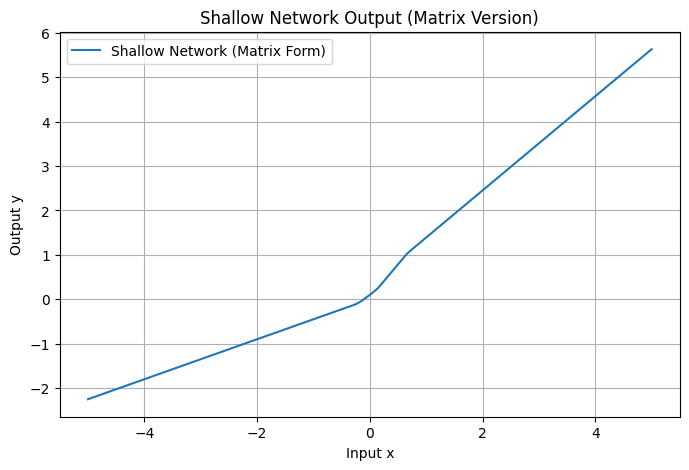

Max difference between single and matrix outputs: 4.76837158203125e-07


In [8]:
# Define the matrix-version shallow network
def shallow_network_matrix(X):
    """
    X: a tensor of shape [1, n] where each column is an input value.
    Returns: a tensor of shape [1, n] with network outputs.
    """
    # First layer: matrix multiplication. w1: [3,1] times X: [1,n] gives [3,n]
    # Add bias b1 (reshaped to [3,1]) and apply ReLU.
    H = relu(torch.matmul(w1, X) + b1.view(3,1))

    # Second layer: w2 is a vector of shape [3]. Reshape to [1,3] for matmul.
    Y = torch.matmul(w2.view(1,3), H) + b2  # Y will have shape [1, n]
    return Y

# Prepare input data in matrix form: shape [1, n]
X_matrix = torch.tensor(x_values, dtype=torch.float32).unsqueeze(0)  # shape: [1,100]

# Run the network on all inputs at once
Y_matrix = shallow_network_matrix(X_matrix)  # shape: [1,100]

# Plot the results (convert tensor to numpy)
plt.figure(figsize=(8,5))
plt.plot(x_values, Y_matrix.squeeze().numpy(), label="Shallow Network (Matrix Form)")
plt.xlabel("Input x")
plt.ylabel("Output y")
plt.title("Shallow Network Output (Matrix Version)")
plt.legend()
plt.grid(True)
plt.show()

# Check that both versions produce the same output (within numerical error)
y_matrix_list = Y_matrix.squeeze().tolist()
diff = np.abs(np.array(y_outputs_single) - np.array(y_matrix_list))
print("Max difference between single and matrix outputs:", diff.max())


## 4. Define and Run a Second Neural Network on the Output of the First

Now we create a second shallow network (with the same architecture) that takes the output of the first network as its input.
We'll define a new set of parameters and run it using the matrix method.


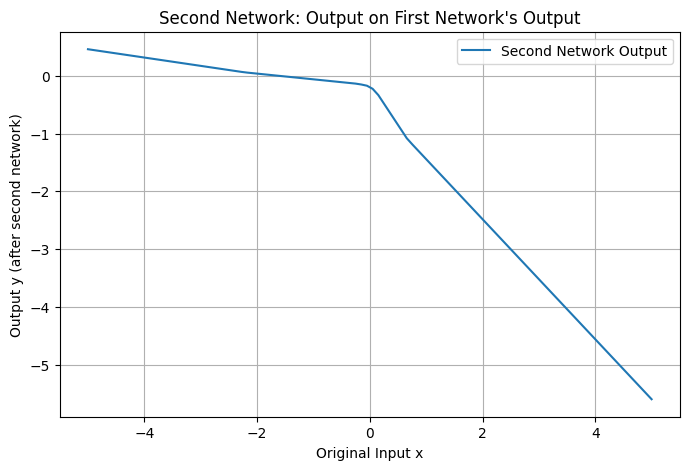

In [9]:
# Define parameters for the second network (shallow)
# First layer: 1 input -> 3 hidden neurons
w1_2 = torch.tensor([[-0.4],    # neuron 1 weight
                     [0.9],     # neuron 2 weight
                     [0.2]])    # neuron 3 weight  (shape: [3,1])
b1_2 = torch.tensor([0.05, -0.1, 0.2])   # shape: [3]

# Second layer: 3 hidden -> 1 output
w2_2 = torch.tensor([0.8, -1.2, 0.5])      # shape: [3]
b2_2 = torch.tensor(-0.3)                 # scalar

def shallow_network_matrix_2(X):
    """
    Second network: X is a tensor of shape [1, n].
    Returns: tensor of shape [1, n] with outputs.
    """
    H = relu(torch.matmul(w1_2, X) + b1_2.view(3,1))
    Y = torch.matmul(w2_2.view(1,3), H) + b2_2
    return Y

# Use the output of the first network (Y_matrix) as input to the second network.
Y_second = shallow_network_matrix_2(Y_matrix)

# Plot the second network's output versus the original x values.
plt.figure(figsize=(8,5))
plt.plot(x_values, Y_second.squeeze().numpy(), label="Second Network Output")
plt.xlabel("Original Input x")
plt.ylabel("Output y (after second network)")
plt.title("Second Network: Output on First Network's Output")
plt.legend()
plt.grid(True)
plt.show()


## 5. Define a Deep Network with 3 Hidden Layers

We'll now build a deep network with 3 hidden layers. The architecture is as follows:

1. **Layer 1:** Input (1) → Hidden1 (3)
2. **Layer 2:** Hidden1 (3) → Hidden2 (3)
3. **Layer 3:** Hidden2 (3) → Hidden3 (3)
4. **Layer 4:** Hidden3 (3) → Output (1)

For each layer, we manually define weights and biases. We use matrix multiplication to process all inputs at once.


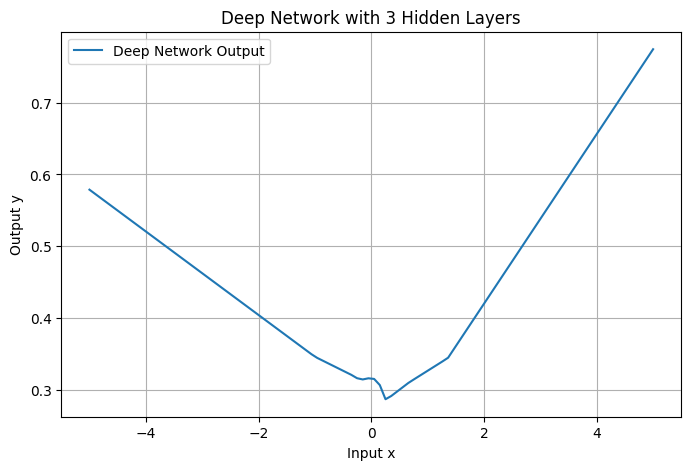

In [10]:
# Define parameters for the deep network
# Layer 1: 1 -> 3
w1_deep = torch.tensor([[0.5],
                        [-0.3],
                        [0.8]])            # shape: [3,1]
b1_deep = torch.tensor([0.1, 0.2, -0.1])    # shape: [3]

# Layer 2: 3 -> 3
w2_deep = torch.tensor([[0.2, -0.1, 0.3],
                        [0.4,  0.5, -0.2],
                        [-0.3, 0.2, 0.1]])   # shape: [3,3]
b2_deep = torch.tensor([0.0, 0.1, -0.1])      # shape: [3]

# Layer 3: 3 -> 3
w3_deep = torch.tensor([[1.0, -0.5, 0.3],
                        [0.7,  0.2, -0.4],
                        [-0.6, 0.8, 0.5]])    # shape: [3,3]
b3_deep = torch.tensor([0.05, -0.05, 0.1])     # shape: [3]

# Layer 4 (Output): 3 -> 1
w4_deep = torch.tensor([[0.6, -0.3, 0.4]])      # shape: [1,3]
b4_deep = torch.tensor(0.2)                     # scalar

def deep_network_matrix(X):
    """
    Deep network with 3 hidden layers.
    X: tensor of shape [1, n] (input)
    Returns: tensor of shape [1, n] (output)
    """
    # Layer 1
    H1 = relu(torch.matmul(w1_deep, X) + b1_deep.view(3,1))
    # Layer 2
    H2 = relu(torch.matmul(w2_deep, H1) + b2_deep.view(3,1))
    # Layer 3
    H3 = relu(torch.matmul(w3_deep, H2) + b3_deep.view(3,1))
    # Output layer
    Y = torch.matmul(w4_deep, H3) + b4_deep
    return Y

# Use the same range of x values (as before) for input
# Prepare input matrix: shape [1, n]
X_deep = torch.tensor(x_values, dtype=torch.float32).unsqueeze(0)
Y_deep = deep_network_matrix(X_deep)

# Plot the deep network's output vs the input x values.
plt.figure(figsize=(8,5))
plt.plot(x_values, Y_deep.squeeze().numpy(), label="Deep Network Output")
plt.xlabel("Input x")
plt.ylabel("Output y")
plt.title("Deep Network with 3 Hidden Layers")
plt.legend()
plt.grid(True)
plt.show()


Now you have a complete notebook that:

Implements a custom ReLU.
Defines and runs a shallow network in two ways (processing one input at a time and via matrix operations).
Feeds the output of the first network into a second shallow network.
Implements a deep network with 3 hidden layers.
Now modify weights, biases, or network architectures and experiment further!